In [2]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path - Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [3]:
import torch, numpy as np, pandas as pd, matplotlib.pyplot as plt
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

## Cleaning Up Our Dataset

In [4]:
path = Path('titanic')
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace = True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

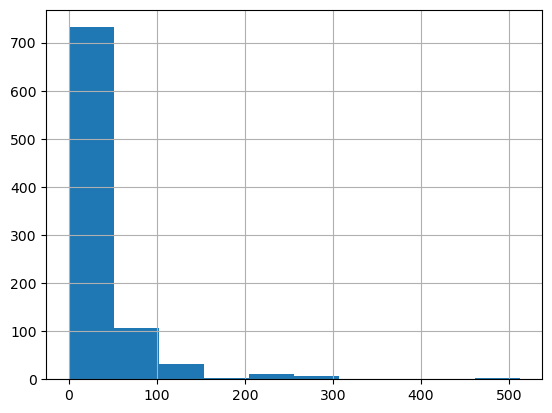

In [10]:
df['Fare'].hist()

In [11]:
df['LogFare'] = np.log(df['Fare'] + 1)

<Axes: >

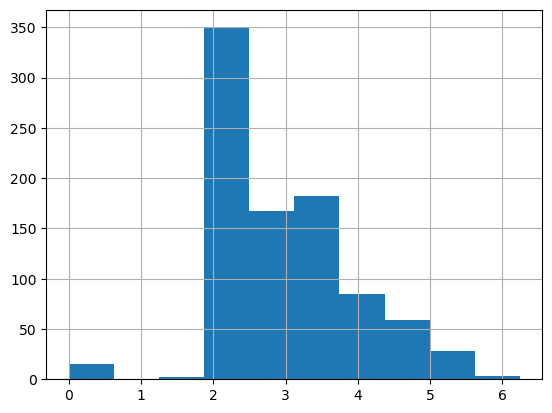

In [12]:
df['LogFare'].hist()

In [13]:
#Checking the purpose of Pclass column (They seem to be categories)
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [14]:
#describe all non-numeric variables
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,691,646


In [15]:
# We need to be able to multiply these non-numeric columns by coefficients so we need to make dummy variables of true (1) or false (0) boolean columns
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"], dtype=float)
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Creates a tensor matrix of the dependent variable, whether the entry has survived or not

In [17]:
from torch import tensor
t_dep = tensor(df.Survived)

Creates another tensor matrix of the independent variables that we will test with to predict if the entry survived or not. It includes the rows we had to clean such as LogFare(formally Fare), 'Sex_male' and 'Sex_female'(formally Sex), 'Pclass_1', 'Pclass_2' and 'Pclass_3'(formally known as Pclass) and finally 'Embarked_C', 'Embarked_Q' and 'Embarked_S'(formally Embarked).

In [18]:
indep_cols = ['Age','SibSp','Parch','LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

Shows you how many rows and columns

In [19]:
t_indep.shape

torch.Size([891, 12])

Tells you the number of (rank) dimensions the tensor has, a vector is rank 1, a matrix is rank 2 

In [20]:
len(t_indep.shape)

2

# Setting up a linear model

We need to multiply our rows of data by coefficients that are randomized and made for each column:  

<img src="Example-of-a-linear-ML-model-The-outcome-y-is-predicted-by-the-multiplication-of-feature.png"
     alt="linear ML model outcome" />    

#1 Set the seed for the tensor to simulate creating some "random" number generation.  
#2 Grabbing the number of coefficients we need to multiply against our matrix.  
#3 Generate n_coeff amount of random coefficients between 0 and 1. We subtract 0.5 to center the values so max = 0.5 and min = -0.5.

In [21]:
torch.manual_seed(442) #1

n_coeff = t_indep.shape[1] #2
coeffs = torch.rand(n_coeff) - 0.5 #3
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

We then multiply our matrix to our vector via element-wise multiplication through broadcasting and the use of (*) symbol:
  
<img src="Numpy-Broadcasting.png"
     alt="linear ML model outcome" />


Seeing that our Matrix was 861 rows and 12 columns. Our Vector matches to have 12 coefficients that will broadcast that:

- For every coefficient in the vector, each row of the matrix will be mutiplied by that same coefficient based on the index of that column.

- Our vector becomes a matrix with a repeating values for over 861 rows


In [22]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

Since the first column above has a big outputs compared to its other columns, this means when it will be multiplied by its coefficient that it will be significantly impacted differently than the other columns. To fix that we are going to normalize the values by dividing by the maximum value

In [23]:
vals,indices = t_indep.max(dim = 0)
t_indep = t_indep / vals

In [24]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [25]:
#axis specfies that we want to add up our multipied matrix by the columns
preds = (t_indep*coeffs).sum(axis=1)

In [26]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [27]:
#Calculating loss value based by absolute value of | prediction - tensor actual | and take the mean
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

# Create functions to automate and repeat our steps

In [28]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

# Doing a gradient descent step

In [29]:
# To calculate derivatives automatically, we can call requires_grad_() to perform that but any function with an (_) at the end will update the values
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [30]:
# Now we get the calculated loss with the ability to revert backwards for the coefficients gradient values from before
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [31]:
loss.backward()

In [32]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

This tells us that if we increased the first columns value, the loss function will go down by that much

In [33]:
# Setting a learning rate for the model to now use and update its values based on what we get through gradient descent

with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5197)


# Training the linear model

Splitting your data for training and validation sets

In [34]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

/home/devcontainers/conda/envs/env-01/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
# These are just indices
val_split

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [36]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

Taking past steps and automating them as functions here

In [37]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * 0.1)

In [38]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, t_indep, t_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss: .3f}", end="; ")

In [39]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [40]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr = lr)
    return coeffs

In [41]:
coeffs = train_model(8, lr =0.02)

 0.538;  0.520;  0.492;  0.471;  0.411;  0.366;  0.334;  0.310; 

# Successfully Build and Trained a linear model

In [42]:
# Showing what the coefficients are for each variable
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2279),
 'SibSp': tensor(0.0982),
 'Parch': tensor(0.2528),
 'LogFare': tensor(0.1197),
 'Sex_male': tensor(-0.4260),
 'Sex_female': tensor(0.3710),
 'Pclass_1': tensor(0.8663),
 'Pclass_2': tensor(0.4548),
 'Pclass_3': tensor(0.2830),
 'Embarked_C': tensor(0.1905),
 'Embarked_Q': tensor(0.3436),
 'Embarked_S': tensor(0.1226)}

# Measuring accuracy

In [43]:
preds = calc_preds(coeffs, val_indep)

In [44]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [45]:
results.float().mean()

tensor(0.7921)

In [46]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7921)

# Using Sigmoid

In [47]:
preds[:28]

tensor([ 1.1508,  0.1739,  0.0196,  0.1827,  0.1307,  0.1260,  0.9264,  0.9192,  0.1966,  0.8910, -0.0696,  0.0870,  0.0705,  0.9712,
        -0.0786,  0.4983,  0.4413,  0.9825,  0.1035,  0.7319, -0.0468,  0.4669,  1.4616,  0.9885, -0.0374,  0.2064,  0.8760,  0.4499])

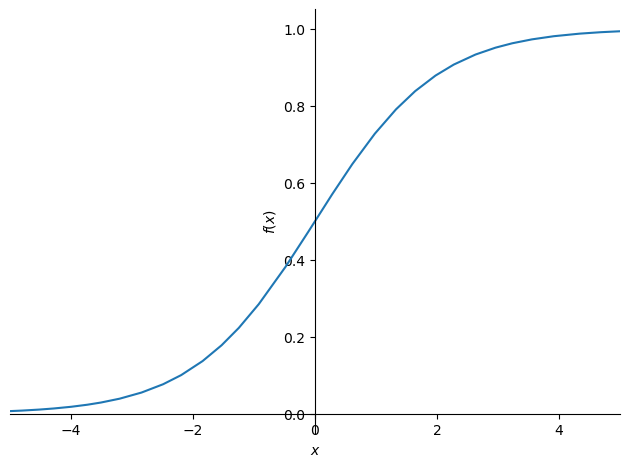

In [48]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [49]:
# We redefine one of our past functions to caclucate the predictions will now pass the values through the sigmoid function above to make a more optimized result

def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [50]:
coeffs = train_model(lr=2)

 0.511;  0.509;  0.505;  0.499;  0.490;  0.480;  0.468;  0.454;  0.439;  0.423;  0.407;  0.391;  0.376;  0.363;  0.351;  0.340;  0.331;  0.323;  0.316;  0.310;  0.304;  0.299;  0.294;  0.289;  0.284;  0.279;  0.274;  0.269;  0.264;  0.259; 

In [51]:
acc(coeffs)

tensor(0.7921)

In [52]:
show_coeffs()

{'Age': tensor(-0.9737),
 'SibSp': tensor(-0.0032),
 'Parch': tensor(0.2395),
 'LogFare': tensor(-0.3622),
 'Sex_male': tensor(-3.4605),
 'Sex_female': tensor(1.6274),
 'Pclass_1': tensor(1.2754),
 'Pclass_2': tensor(0.4307),
 'Pclass_3': tensor(-1.8802),
 'Embarked_C': tensor(-0.0649),
 'Embarked_Q': tensor(0.1144),
 'Embarked_S': tensor(-1.1710)}

# Using matrix product

In [53]:
# @ is a python matrix multiplier
val_indep@coeffs

tensor([ 1.7300, -5.6441, -5.8200, -4.6701, -4.6582, -4.7944, -0.4813,  0.3931, -6.6706, -0.7531, -7.0282, -5.8199, -6.6657, -0.5572,
        -7.0424, -4.0963, -4.3397,  0.4314, -4.8667, -1.9329, -6.9306, -4.2302,  2.1289,  0.1392, -6.8762, -5.7059, -1.5413, -4.3032,
        -6.8502, -0.5564,  0.5947, -1.7653, -6.8698, -7.0108,  1.6570, -1.5716, -4.1346,  2.2990, -6.9316, -1.8555, -4.5738, -6.9316,
        -4.7565,  2.1961, -6.8830, -1.9383, -7.0633, -6.8781, -5.6387, -1.8141, -2.8688, -6.7680, -6.7448, -6.9370, -4.6590, -4.7320,
        -5.6442, -7.1131, -6.8951, -7.0233, -2.8100, -6.8401, -4.5291, -6.8943,  0.1599, -3.8249, -4.6461, -7.1735, -5.8363,  0.1842,
        -6.9550, -0.6917, -4.7198, -6.9403, -3.8394, -6.8325, -6.9316, -4.0809, -4.5852, -4.9337, -4.3879,  2.3378, -6.9185, -6.9263,
         0.1368, -3.5372, -2.7422,  1.3624,  1.4652, -4.6339, -7.0310, -6.9316,  2.2013, -5.8930, -0.4623, -3.6854, -4.9519, -0.6163,
        -0.5320, -5.5763, -6.8178, -0.5564, -7.0280, -7.0037, 

In [54]:
# Simplifying what we had before

def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [55]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.2).requires_grad_()

In [56]:
trn_dep = trn_dep[:, None]
val_dep = val_dep[:, None]

In [57]:
trn_dep.shape

torch.Size([713, 1])

In [58]:
coeffs = train_model(lr=2)

 0.523;  0.522;  0.521;  0.519;  0.517;  0.514;  0.510;  0.506;  0.501;  0.495;  0.489;  0.483;  0.475;  0.468;  0.460;  0.452;  0.445;  0.437;  0.431;  0.424;  0.418;  0.413;  0.409;  0.405;  0.401;  0.398;  0.396;  0.394;  0.392;  0.391; 

In [59]:
acc(coeffs)

tensor(0.5955)

In [60]:
# This sequence of steps turns our vector into a matrix with n number of rows but a 1 column for entry
coeffs.shape

torch.Size([12, 1])

# A Neural Network

In [61]:
# Define a function to create the number of coefficient columns you would like to build your Neural Network
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [62]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [63]:
def update_coeffs(coeffs, lr):
    for layer in coeffs: layer.sub_(layer.grad * lr)

In [67]:
coeffs = train_model(epochs= 50,lr=1)

 0.542;  0.538;  0.530;  0.519;  0.502;  0.479;  0.452;  0.424;  0.402;  0.390;  0.386;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384; 

In [65]:
acc(coeffs)

tensor(0.5955)

# Deep Learning

We are increasing the hidden layers from just one, to n number of layers

In [ ]:
def init_coeffs():
    hiddens = [10, 10] # <- set this to the size of each hidden layer that you would want
    sizes = [n_coeff] + hiddens + [1] # sizes now equals the number of required coefficients + the number of hidden layers set + 1 creating the new matrix
    n = len(sizes) # Gets the new length based on new hidden layer requirements
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.5)/sizes[i+1]*4 for i in range(n-1)] # calculate based on the range between 0 to n-1, the random number generated from (index at i and i + 1) - 0.3 / index i +1*4
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [99]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps
    for i, l in enumerate(layers): # loops all the layers of the matrix
        res = res@l + consts[i]  # performs matrix multiplication then adds the constant
        if i!= n-1: res = F.relu(res) # perform relu as long as its not the last layer
    return torch.sigmoid(res) # if last layer then perform the final sigmoid function

In [100]:
# After training the coefficients need to be updated based on their work
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts: layer.sub_(layer.grad * lr)

In [101]:
coeffs = train_model(lr=1.4)

 0.487;  0.405;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384;  0.384; 

In [102]:
acc(coeffs)

tensor(0.5955)

Stopped at 35:10